# Point Source

**Scott Prahl**

**Oct 2023**

We use Green's function solutions for heat transfer due to a point
source in an infinite medium, encapsulated within the `Point` class. The
solutions are based on the mathematical formulations provided in Carslaw and
Jaeger's work.

The `Point` class represents a point heat source located at a specified position
`(xp, yp, zp)` in the medium. It provides methods to calculate the temperature
rise at any given location `(x, y, z)` at a specified time `t` due to different
types of heat source behavior.

Three types of point source behaviors are supported:

- `instantaneous()`: Represents a single, instantaneous release of heat from (xp,yp,zp) at time `tp`.

- `continuous()`: Represents a continuous release of heat from (xp,yp,zp) starting at t=0

- `pulsed()`: Represents a pulsed release of heat from (xp,yp,zp) for t=0 to `t_pulse`.

Each of these line sources can be analyzed under different boundary conditions at z=0:

- `'infinite'`: No boundary (infinite medium).

- `'adiabatic'`: No heat flow across the boundary.

- `'zero'`: Boundary is fixed at T=0.

The module supports various boundary conditions such as infinite, adiabatic, or
zero boundary, and allows for specifying thermal properties like diffusivity and
volumetric heat capacity of the medium.


In [1]:
import grheat
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Instantaneous 1J point source located a depth of 1mm

### No boundary (infinite medium)

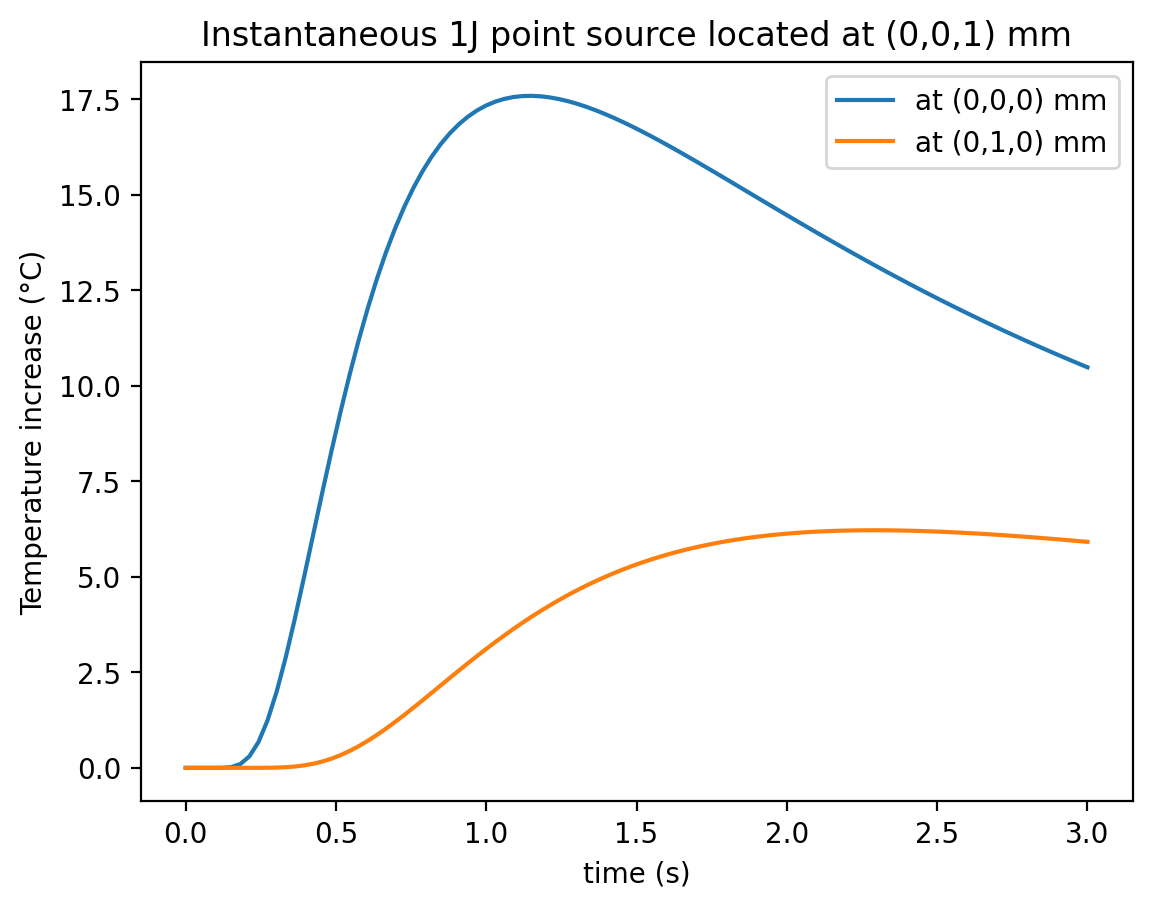

In [2]:
xp, yp, zp = 0, 0, 0.001 # meters
tp = 0                   # seconds impulse time
t = np.linspace(0,3,100) # seconds

point = grheat.Point(xp, yp, zp, tp)

T = point.instantaneous(0,0,0,t)
plt.plot(t,T, label='at (0,0,0) mm')

T = point.instantaneous(0,0.001,0,t)
plt.plot(t,T, label='at (0,1,0) mm')

plt.legend()
plt.xlabel("time (s)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1J point source located at (0,0,1) mm")
plt.show()

### Continuous flow across boundary

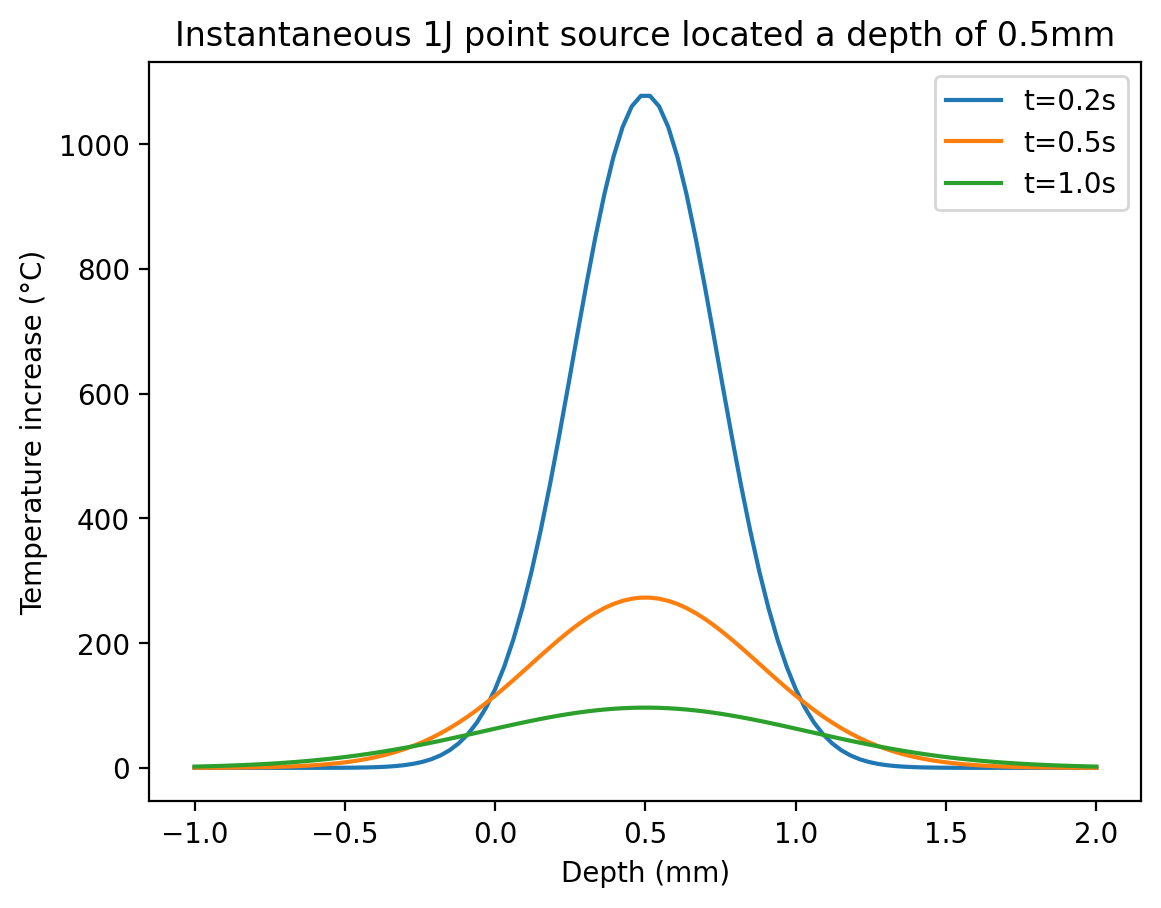

In [3]:
tp = 0                       # seconds impulse time
t = np.linspace(0,3,100)     # seconds
xp, yp, zp = 0, 0, 0.0005     # meters
z = np.linspace(-0.001,0.002,100) # meters

point = grheat.Point(xp, yp, zp, tp)

for t in [0.2, 0.5, 1.0]:
    T = point.instantaneous(0,0,z,t)
    plt.plot(z*1000,T, label='t=%.1fs'%t)
    
plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1J point source located a depth of %.1fmm"%(zp*1000))
plt.legend()
plt.show()

### Showing adiabatic boundary condition

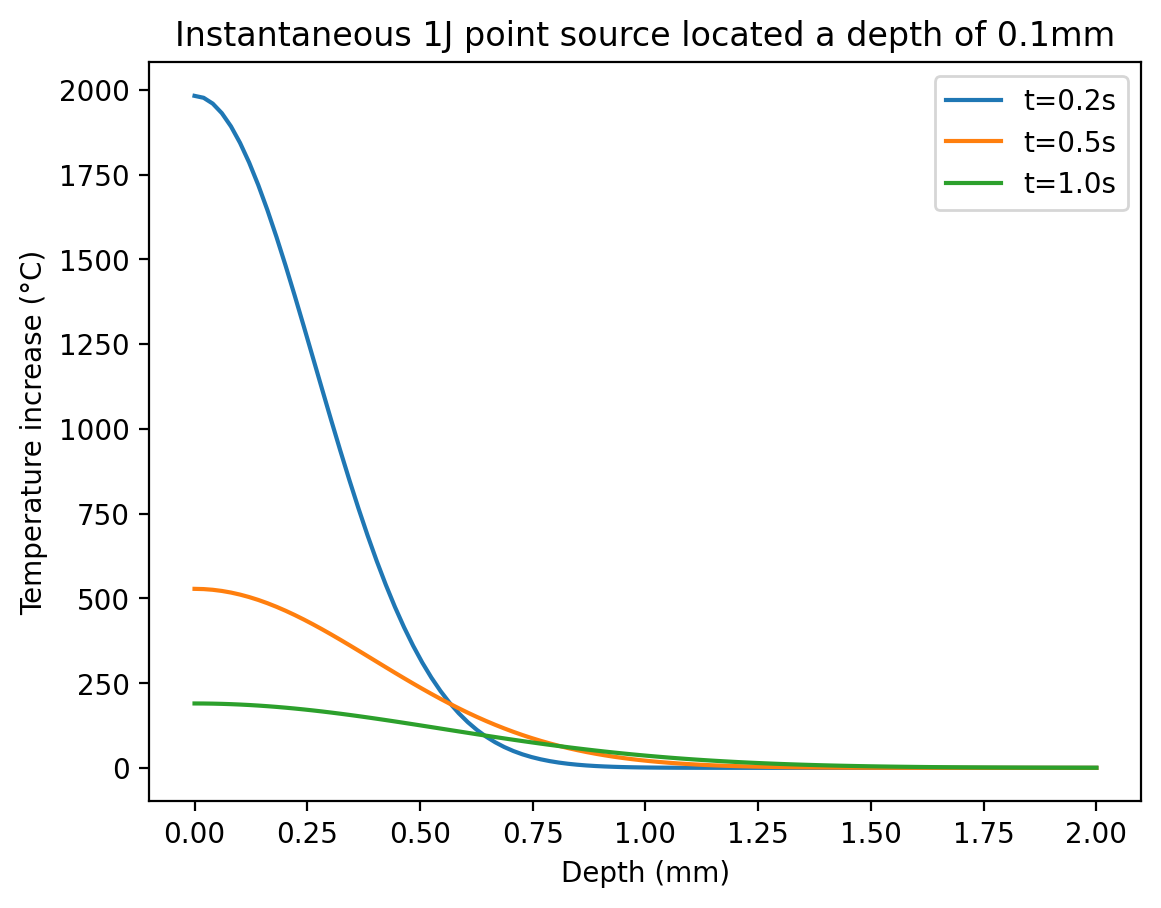

In [4]:
tp = 0                            # seconds impulse time
t = np.linspace(0,3,100)          # seconds
xp, yp, zp = 0, 0, 0.0001         # meters
z = np.linspace(0,0.002,100)      # meters

point = grheat.Point(xp, yp, zp, tp, boundary='adiabatic')

for t in [0.2, 0.5, 1.0]:
    T = point.instantaneous(0,0,z,t)
    plt.plot(z*1000,T, label='t=%.1fs'%t)
    
plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1J point source located a depth of %.1fmm"%(zp*1000))
plt.legend()
plt.show()

### Showing zero boundary condition

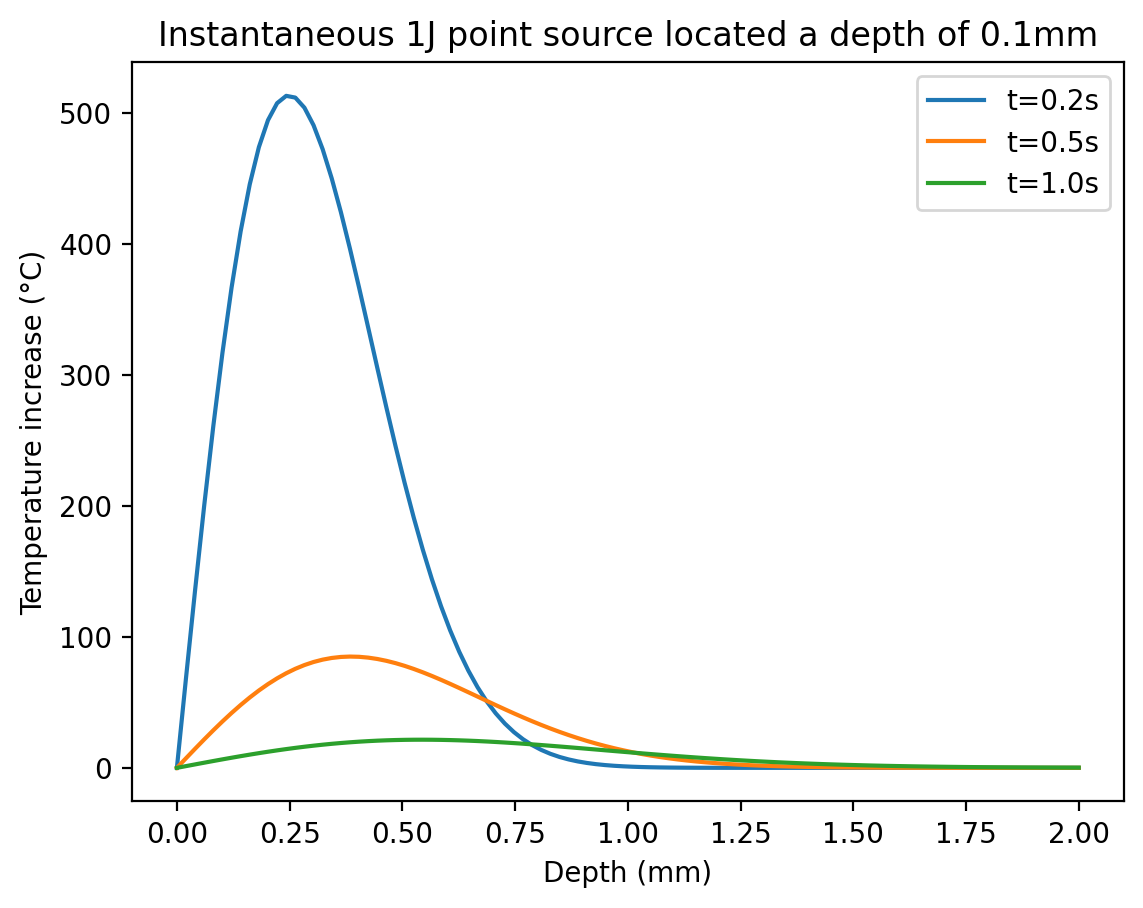

In [5]:
tp = 0                       # seconds impulse time
t = np.linspace(0,3,100)     # seconds
xp, yp, zp = 0, 0, 0.0001     # meters
z = np.linspace(0,0.002,100) # meters

point = grheat.Point(xp, yp, zp, tp, boundary='zero')

for t in [0.2, 0.5, 1.0]:
    T = point.instantaneous(0,0,z,t)
    plt.plot(z*1000,T, label='t=%.1fs'%t)
    
plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1J point source located a depth of %.1fmm"%(zp*1000))
plt.legend()
plt.show()

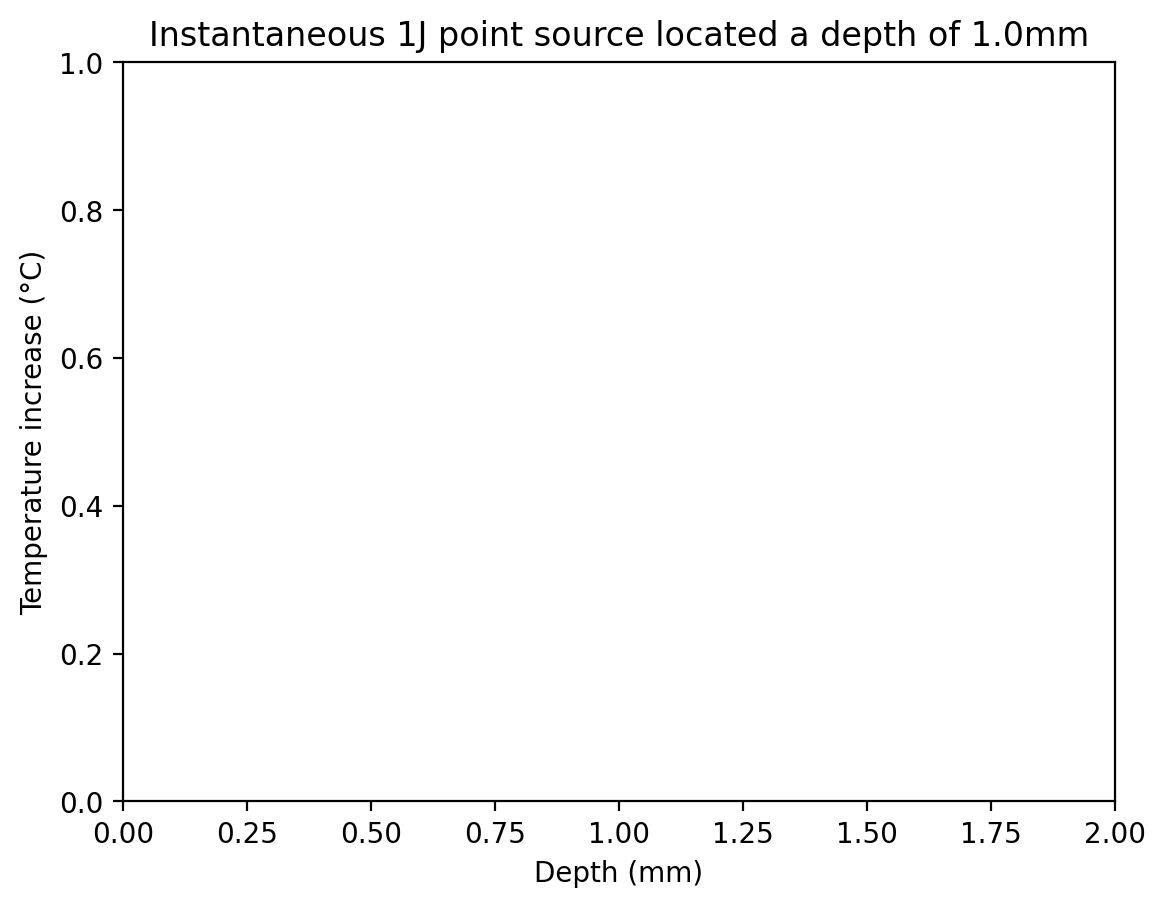

In [6]:
tp = 0                          # seconds
t = np.linspace(0.000, 0.2, 21) # seconds
xp, yp, zp = 0, 0.0001, 0.001   # m
x = 0                           # m
y = 0                           # m
z = np.linspace(0,0.002,101)    # m
zz = 1000 * z                   # mm

point = grheat.Point(xp, yp, zp, tp, boundary='zero')
T_data = point.instantaneous(x,y,z,z[50])

# Create figure and axis
fig, ax = plt.subplots()

# need a line object from the graph that will be continually updated
ln, = plt.plot(zz, T_data)

def init():
    plt.xlabel("Depth (mm)")
    plt.ylabel('Temperature increase (°C)')
    plt.title("Instantaneous 1J point source located a depth of %.1fmm"%(zp*1000))
    plt.xlim(zz[0],zz[-1])
    return ln,

def update(t):
    T_data = point.instantaneous(0,0,z,t)    
    ln.set_ydata(T_data)
    
    # Autoscale the vertical axis
    ax.relim()
    ax.autoscale_view()
    return ln,

# Create animation
ani = FuncAnimation(fig, update, frames=t, init_func=init, 
                    blit=True, interval=100, repeat=False)

# Close the figure window to prevent the static plot from being displayed
plt.close(fig)

# Display the animation in the Jupyter Notebook
HTML(ani.to_jshtml())



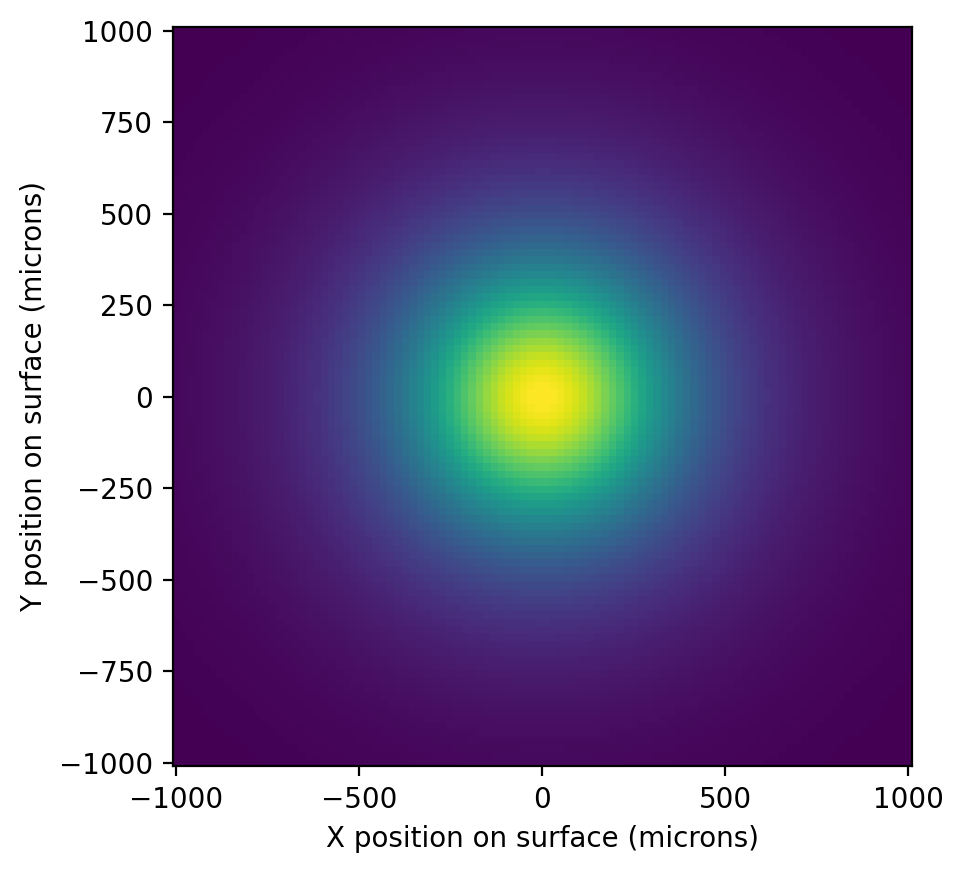

In [7]:
tp = 0                       # seconds impulse time
t = 1.1                      # seconds
t_pulse = 1                  # seconds

xp, yp, zp = 0, 0, 0.0001           # meters

arr = np.linspace(-1,1,100) * 0.001 # meters
X, Y = np.meshgrid(arr, arr)        # meters     
z = np.linspace(0,0.002,100)        # meters

point = grheat.Point(xp, yp, zp, tp, boundary='adiabatic')

T = point.pulsed(X, Y, 0, t, t_pulse)
plt.pcolormesh(X*1e6, Y*1e6, T)
plt.xlabel("X position on surface (microns)")
plt.ylabel("Y position on surface (microns)")
plt.gca().set_aspect(1)
plt.show()

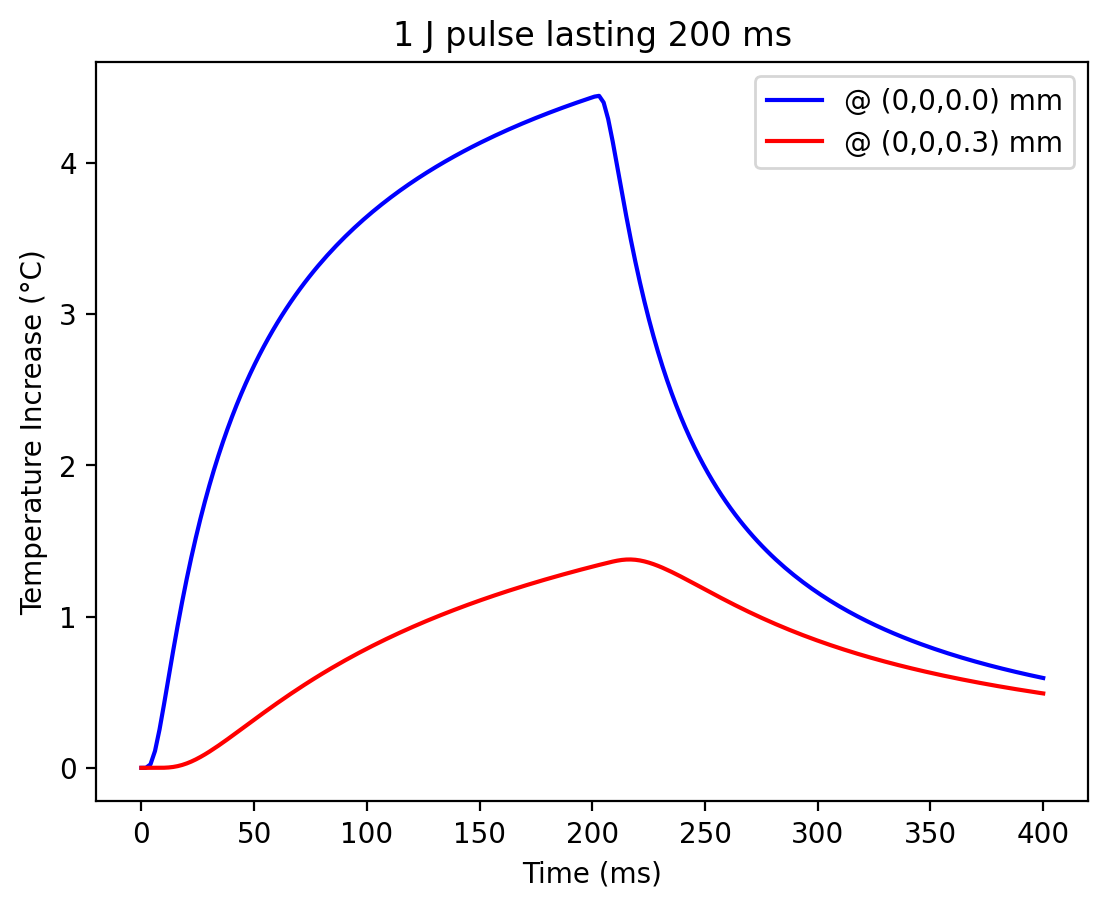

In [20]:
xp, yp, zp = 0, 0, 0.0001         # m
point = grheat.Point(xp,yp,zp)

t_pulse = 0.200                        # seconds
t = np.linspace(0, 2*t_pulse, 200)     # seconds

x, y, z = 0, 0, 0                      # meters
T = point.pulsed(x, y, z, t, t_pulse)  # 1 J
T *= 1e-3                              # 1 mJ

plt.plot(t * 1000, T, color='blue', label="@ (0,0,%.1f) mm"%(1000*z))

x, y, z = 0, 0, 0.0003                 # meters
T = point.pulsed(x, y, z, t, t_pulse)  # 1 J
T *= 1e-3                              # 1 mJ

plt.plot(t * 1000, T, color='red', label="@ (0,0,%.1f) mm"%(1000*z))

plt.xlabel("Time (ms)")
plt.ylabel("Temperature Increase (°C)")
plt.title("1 J pulse lasting %.0f ms" % (t_pulse * 1000))
plt.legend()
plt.show()